#### Arbitrary Value Imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value

In [29]:
import pandas as pd

In [4]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(30)


<Axes: >

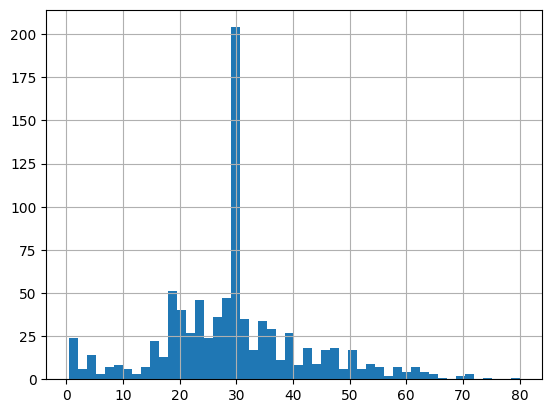

In [14]:
impute_nan(df,'Age')
df['Age_hundred'].hist(bins=50)


### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

##### How To Handle Categroical Missing Values

##### Frequent Category Imputation

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [16]:
df.shape

(1460, 4)

In [17]:
df.isnull().sum()

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


In [18]:
df.isnull().mean().sort_values(ascending=True)

,0
SalePrice,0.000000
BsmtQual,0.025342
GarageType,0.055479
FireplaceQu,0.472603


### Compute the frequency with every feature

<Axes: xlabel='BsmtQual'>

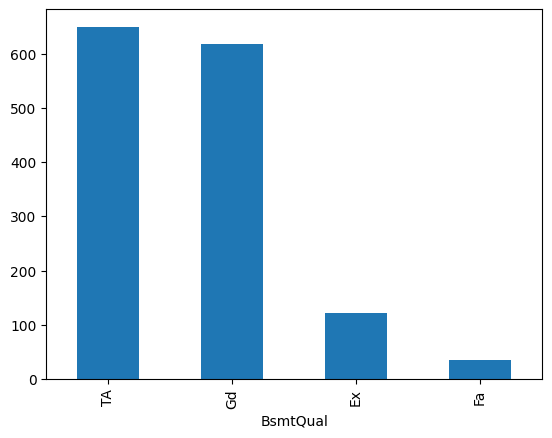

In [19]:
df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='BsmtQual'>

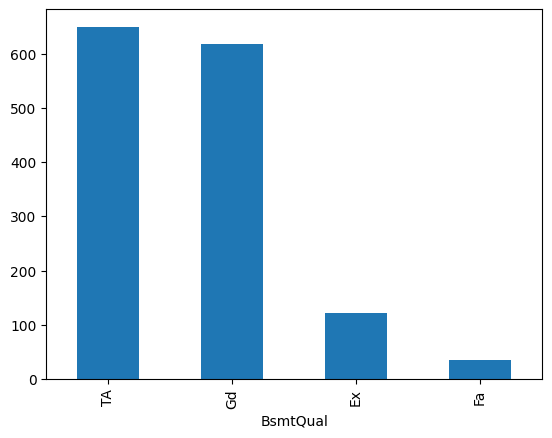

In [20]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: xlabel='GarageType'>

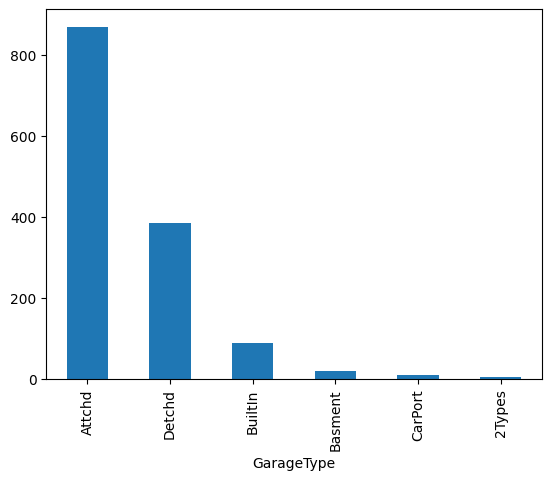

In [21]:
df['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

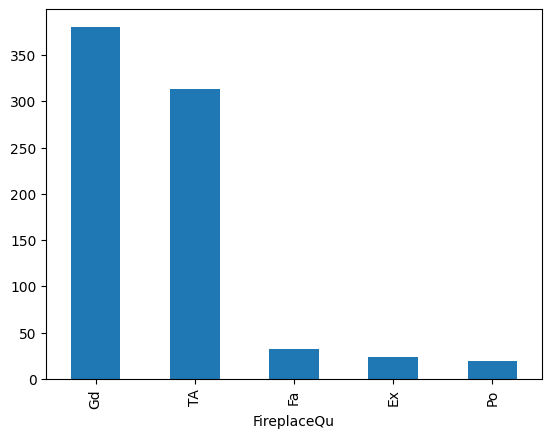

In [22]:
df['FireplaceQu'].value_counts().plot.bar()

In [23]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [24]:
df['GarageType'].mode()[0]

'Attchd'

In [25]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [26]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

<ipython-input-25-2451126640>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_category,inplace=True)


In [27]:
df.isnull().mean()

,0
BsmtQual,0.0
FireplaceQu,0.0
GarageType,0.0
SalePrice,0.0


#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

##### Adding a variable to capture NAN

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df['BsmtQual'].mode()[0]

'TA'

In [ ]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [30]:
import pandas as pd

In [31]:
df=pd.read_csv("data (2).csv")
df.head()

,NAME,GENDER,LOCATION,HEIGHT,WEIGHT,LEARNING ABILITY,SHOE SIZE
0,ASLAM,M,KAKKANAD,180,80,FAST,9
1,ASHMI,NaN,POOTHOTTA,164,43,FAST,5
2,JUHANA,F,PANANGAD,172,52,NaN,7
3,HIBA,F,WAYANAD,159,49,FAST,5
4,KUTTU,NaN,MULAMTHURUTHY,174,76,FAST,8


FileNotFoundError: [Errno 2] No such file or directory: 'data(2).csv'

In [36]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [37]:
for feature in ['GENDER','LEARNING ABILITY']:
    impute_nan(df,feature)

<ipython-input-36-2451126640>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_category,inplace=True)


In [38]:
df

,NAME,GENDER,LOCATION,HEIGHT,WEIGHT,LEARNING ABILITY,SHOE SIZE
0,ASLAM,M,KAKKANAD,180,80,FAST,9
1,ASHMI,M,POOTHOTTA,164,43,FAST,5
2,JUHANA,F,PANANGAD,172,52,FAST,7
3,HIBA,F,WAYANAD,159,49,FAST,5
4,KUTTU,M,MULAMTHURUTHY,174,76,FAST,8
5,SHIM,M,KOTTAYAM,170,73,FAST,8
6,ATHUL,M,TRICHY,169,64,MEDIUM,8
7,SAI,M,VYTILA,172,67,MEDIUM,7
8,SANTHOSH,M,TVM,190,82,MEDIUM,10
9,SANU,F,KOLLAM,168,53,FAST,6
